# Introducción al Análisis Exploratorio de Datos con Pandas

Es un enfoque que comprende un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para **poder responder esa pregunta**.

Su Objetivo es:

- Entender los datos.
- Ver caracteristicas de los datos.
- Detectar irregularidades (outliers) de los datos.
- Obtener valores estadisticos de los datos.
- Realizar visualizaciones rapidas que faciliten el proceso de exploracion.

Usualmente el resultado del mismo suele ser un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas **conclusiones o insights**.

Es un proceso iterativo, que se retroalimenta.

En general realizaremos el análisis del mismo sobre uno o varios Dataframes.

## Temario

Estos son algunos de los temas que intentaremos revisar a lo largo del analisis propuesto

- Visualizaciones
    - Examinando la distribucion de una variables
        - Histograma
        - Density Plot
    - Explorando relacion entre variables
        - Overlaid Histogram
        - Scatter Plot
        - Heatmap
    - Comparando Grupos o categorias
        - Bar Plot
        - Grouped Bar Plot
        - Box Plot
    - Recomendaciones generales para visualizacion
- Concatenacion y Join (Merge) de data frames.

In [78]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

## Analisis Exploratorio de Datos: Kickstarter Projects

Para comenzar a trabajar en la distintas operaciones que podemos realizar con un data frame vamos a trabajar con el siguiente set de datos:

[https://www.kaggle.com/kemical/kickstarter-projects/data](https://www.kaggle.com/kemical/kickstarter-projects/data)

Este set de datos posee informacion de unos 300000 proyectos de Kickstarter la popular plataforma de Crowdsourcing. Nuestro objetivo será realizar un análisis exploratorio sobre esa información, para intentar obtener algunos insights de de la misma.

En particular el dataset tiene dos archivos, uno con informacion parcial recopilada anteriormente y uno con informacion hasta inicios del 2018 (con el que estaremos trabajando).

**Nota:** para aquellos que quieran realizar analisis de los datos anteriores tener en cuenta que el formato de encoding se encuentra en 'Western(windows 1252)' por lo que al realizar la carga con read_csv hay que indicar el encoding como ```encoding='cp1252'```

### Carga de Informacion en un Dataframe

Pandas soporta distintas fuentes de informacion en distintos formatos (desde archivos de csv, excel, hasta fuentes remotas como urls o bases de datos, etc.). En este caso vamos a cargar la informacion desde un CSV que hemos descargado previamente de kaggle. Esto lo podemos hacer con pandas con ```read_csv```. 

Inicialmente podremos ver parte del data frame para tener idea de la estructura del mismo.

In [87]:
# %timeit sirve para evaluar el tiempo de ejecucion
projects_2017 = pd.read_csv('../data/kickstarter-projects/ks-projects-201801.csv')
projects_2017.tail()
#projects_2017

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [81]:
# analizemos primero las dimensiones del data frame
print(projects_2017.shape)

(378661, 15)


In [82]:
# veamos la informacion general del dataframe con info()
print(projects_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


### Analizando propiedades especificas del set de datos

Para poder comenzar a orientar nuestro analisis podemos por ejemplo querer comenzar a analizar algunas variables que nos interesan para aplicar en nuestros analisis.
Podemos por ejemplo comenzar las **categorias disponibles principales**

In [88]:
main_categories = projects_2017['main_category']

In [89]:
# de esta forma obtenemos la cantidad de valores que hay para cada una de las main_categories 
# contando los proyectos por categoria principal
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

Tambien podemos interesarnos en ver los posibles valores que podemos tener de **estados de un proyectos**

In [93]:
states = projects_2017['state']
states.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

En ambos casos, podemos considerar a las variables como categoricas que podremos usar para nuestro analisis, las cuales podremos utilizar para agrupar o dividir informacion, o filtrar informacion a considerar en el mismo.

por otro lado podemos analizar la columna **launched** para entender su uso en el data set.

In [92]:
projects_2017['launched'].head()

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object

In [95]:
projects_2017['launched_datetime'] = pd.to_datetime(projects_2017['launched'])
projects_2017['year'] = projects_2017['launched_datetime'].dt.year

In [97]:
projects_2017['year'].value_counts()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: year, dtype: int64

La cual podemos ver que no indicar la fecha de lanzamiento del proyecto y que podremos utilizar para desarrollar analisis de series de tiempo.

Haciendo un analisis de algunas de las otras variables podemos tambien llegar a la conclusion de lo que representan las siguientes variables:

- **Goal**: Objetivo a obtener de recaudacion para un proyecto
- **Pledged**: Cantidad recaudada para un proyecto
- **Backers**: Cantidad de personas que invirtieron en el proyecto.

### Verificacion de Calidad de Datos

Algunas verificaciones que son utiles para ver la consistencia de los datos, en particular si vienen de una fuente de ese tipo.

Podemos verificar las dimensiones del data frame (via ```.shape```), si existen valores nulos (via ```.insnull```) en el mismo y metricas generales de las columnas o features del data frame que podemos analizar via ```.describe```

In [98]:
# por ejemplo de la siguiente forma podemos ver los nulos si existen
projects_2017.isnull().any()

ID                   False
name                  True
category             False
main_category        False
currency             False
deadline             False
goal                 False
launched             False
pledged              False
state                False
backers              False
country              False
usd pledged           True
usd_pledged_real     False
usd_goal_real        False
launched_datetime    False
year                 False
dtype: bool

In [99]:
projects_2017.isnull().sum()

ID                      0
name                    4
category                0
main_category           0
currency                0
deadline                0
goal                    0
launched                0
pledged                 0
state                   0
backers                 0
country                 0
usd pledged          3797
usd_pledged_real        0
usd_goal_real           0
launched_datetime       0
year                    0
dtype: int64

La informacion que podemos considerar en relacion a los nulos nos permite guiarnos sobre la calidad del set de datos que tenemos y casos en los que podemos ver por ejemplo que datos utilizar o no sobre nuestros analisis o si eventualmente tenemos que realizar algun otro tipo de informacion

In [100]:
# metricas generales de las columnas o features numericos del data frame que podemos analizar via .describe
projects_2017.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,year
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,2014.247829
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,1.933293
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,1970.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,2013.000000
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,2014.000000
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,2016.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,2018.000000


Para nuestros analisis y considerando los valores de media y desviacion podemos ver que hay una gran dispersion tanto en las columnas de goal, pledged y backers. Esto puede darnos algunos problemas para intentar visualizar esas variables.

In [101]:
# para visualizar toda la informacion
projects_2017.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_datetime,year
count,3.786610e+05,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05,378661,378661.000000
unique,NaN,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN,378089,NaN
top,NaN,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN,1970-01-01 01:00:00,NaN
freq,NaN,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN,7,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 01:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-02 15:02:31,NaN
mean,1.074731e+09,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04,NaN,2014.247829
std,6.190862e+08,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06,NaN,1.933293
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02,NaN,1970.000000
25%,5.382635e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03,NaN,2013.000000


In [103]:
#projects_2017['country'].value_counts()
projects_2017 = projects_2017[projects_2017['country'] == 'US']

In [104]:
projects_2017['currency'].value_counts()

USD    292627
Name: currency, dtype: int64

## Analizando la distribucion de variables

Un primer analisis que podemos comenzar a realizar como parte de nuestro analisis exploratorio es intentar comprender la distribucion los distintos valores por cada columna o feature que tenemos en nuestro data frame que queramos analizar.

Entendemos como distribucion a la cantidad de veces que la variable toma determinados valores.

Por lo analizado anteriormente mediante el describe dado que **hay un gran rango de valores posibles para visualizar no vamos a poder realizar en la escala normal** que tienen los datos, es por eso que los llevaremos a analizar **a escala logaritmica**, para poder graficar.

Tener en cuenta que en una escala logarítmica, una diferencia igual en orden de magnitud se representa por una distancia igual. La media geométrica de dos números está a medio camino entre los números y esto facilita graficar.

Text(0,0.5,'Frecuencia')

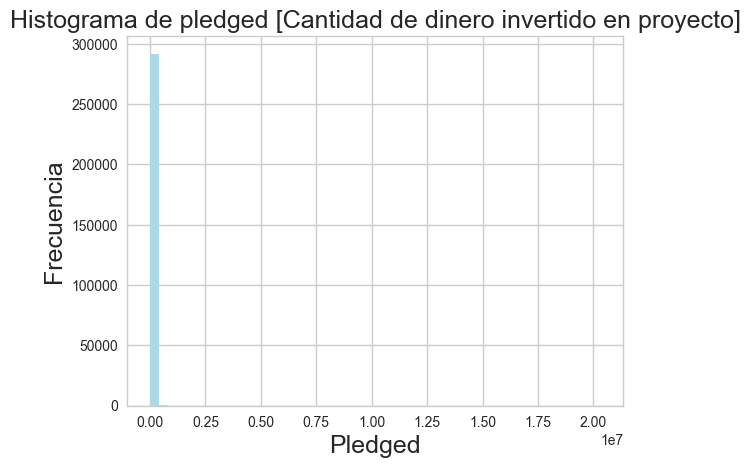

In [105]:
# es importante que el grafico tenga un correcto titulo y valores descriptivos en barras
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
g = projects_2017["pledged"].plot.hist(bins=50, color='lightblue')
g.set_title("Histograma de pledged [Cantidad de dinero invertido en proyecto]", fontsize=18)
g.set_xlabel("Pledged",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [106]:
# creamos nuevas columnas en escala logaritmica
projects_2017["pledged_log"] = np.log(projects_2017["pledged"]+1)
projects_2017["goal_log"] = np.log(projects_2017["goal"]+1)

### Histograma

Un histograma sirve para mostrar la distribucion de una determinada variable. Para construirlo hacen falta dos parametros: la variable en cuestion que tiene que ser numerica (continua o discreta) y el ancho que van a tener las columnas del histograma. Este valor se fija en matplotlib con el valor de bins, que indica cuanto discretizamos los intervalos.


Text(0,0.5,'Frecuencia')

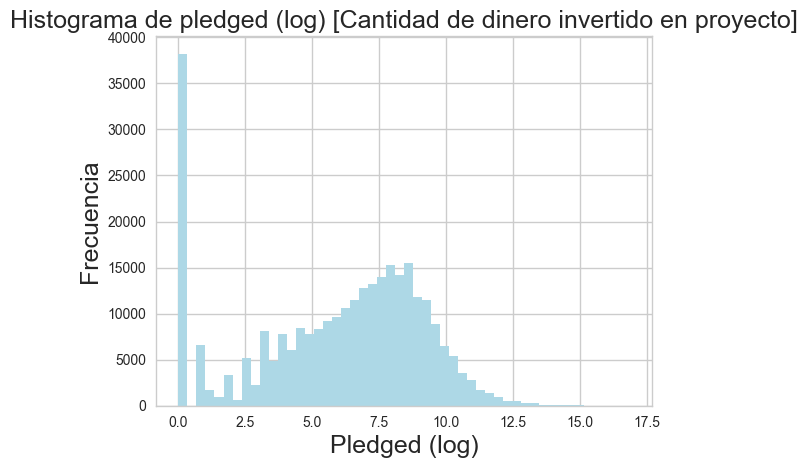

In [118]:
# es importante que el grafico tenga un correcto titulo y valores descriptivos en barras
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
g = projects_2017["pledged_log"].plot.hist(bins=50, color='lightblue')
g.set_title("Histograma de pledged (log) [Cantidad de dinero invertido en proyecto]", fontsize=18)
g.set_xlabel("Pledged (log)",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0,0.5,'Frecuencia')

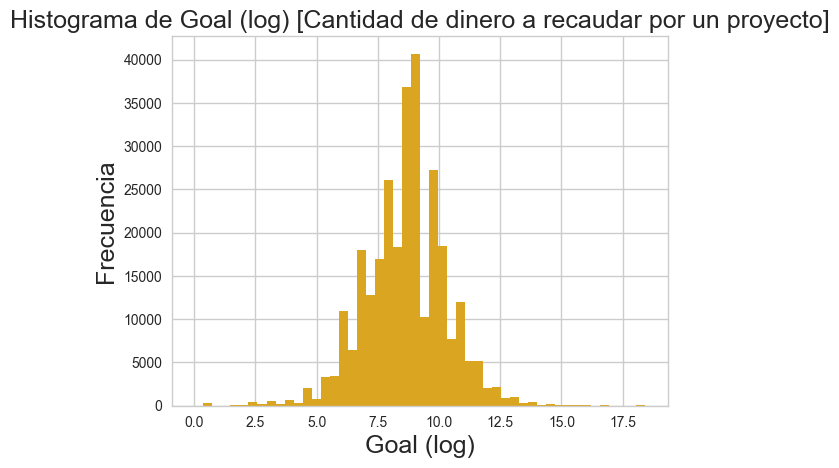

In [110]:
g = projects_2017["goal_log"].plot.hist(bins=50, color='goldenrod')
g.set_title("Histograma de Goal (log) [Cantidad de dinero a recaudar por un proyecto]", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

### Density Plot

Un plot de densidad es una version continua de un histograma (no es necesario indicar el tamaño de los bins). Lo que se muestra es como se distribuye la densidad de la variable numerica a lo largo de todos sus valores posibles.

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

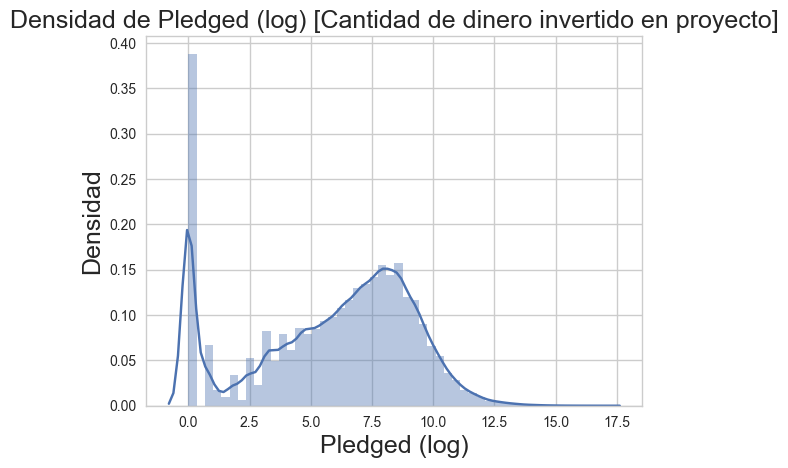

In [111]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
g = sns.distplot(projects_2017["pledged_log"])
g.set_title("Densidad de Pledged (log) [Cantidad de dinero invertido en proyecto]", fontsize=18)
g.set_xlabel("Pledged (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

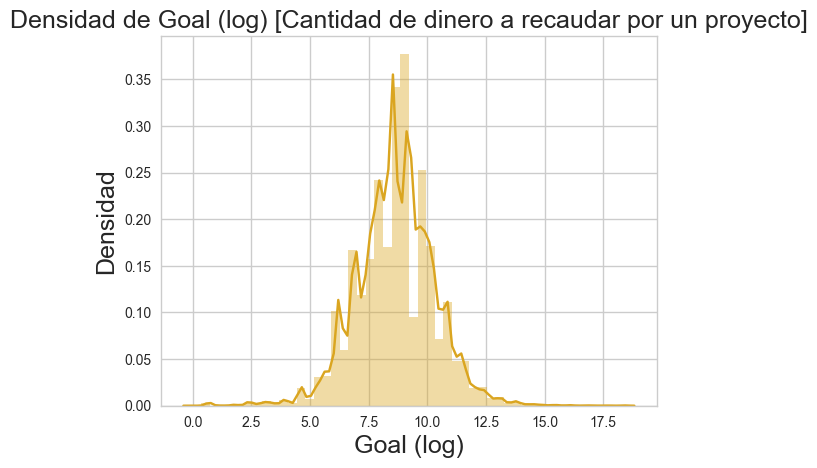

In [112]:
g = sns.distplot(projects_2017["goal_log"], color='goldenrod')
g.set_title("Densidad de Goal (log) [Cantidad de dinero a recaudar por un proyecto]", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

## Overlaid Histogram

Una forma de comparar distribuciones sobre una misma base es realizar un overlay de distintos histogramas.

Text(0,0.5,'Frecuencia')

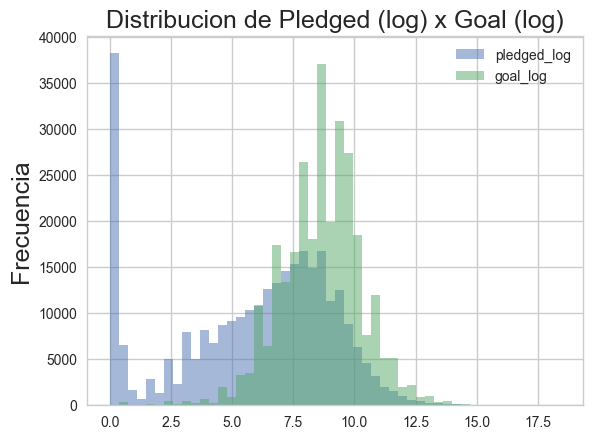

In [122]:
# ambos histogramas juntos
g = projects_2017[["pledged_log","goal_log"]].plot.hist(bins=50,alpha=0.5)
g.set_title("Distribucion de Pledged (log) x Goal (log)", fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

## Overlaid Density Plots

O tambien se pueden analizar directamente comparando sus densidades

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Pledged x Goal cross distribuition')

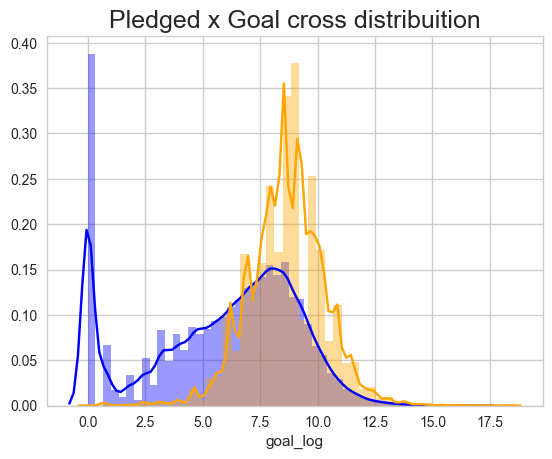

In [123]:
# TODO referencias por color en la visualizacion
g = sns.distplot(projects_2017['pledged_log'], color='blue', label='pledged (log)')
g = sns.distplot(projects_2017['goal_log'], color='orange', label='goal (log)')
g.set_title("Pledged x Goal cross distribuition", fontsize=18)

Por otro lado, podemos analizar las distribuciones de pledged y goal considerando proyectos que hayan side exitosos o hayan fracasado. En las visualizaciones usaremos el rojo para los proyectos que fracasaron y el verde para aquellos que fueron exitosos

In [124]:
failed = projects_2017[projects_2017["state"] == "failed"]
success = projects_2017[projects_2017["state"] == "successful"]

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

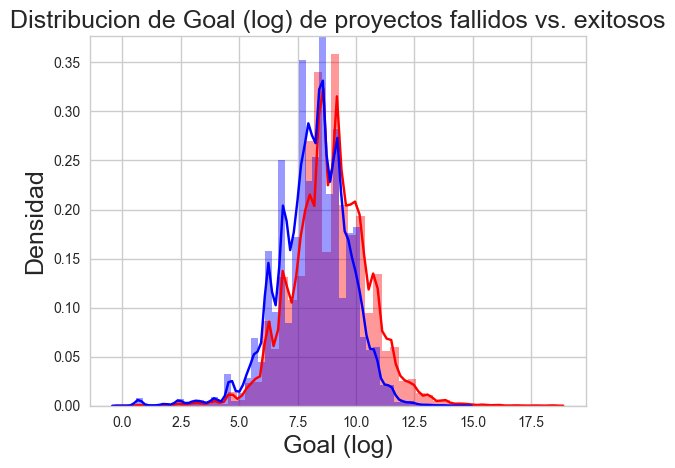

In [125]:
# TODO referencias por color en la visualizacion
g = sns.distplot(failed['goal_log'], color='r')
g = sns.distplot(success['goal_log'], color='b')
g.set_title("Distribucion de Goal (log) de proyectos fallidos vs. exitosos", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

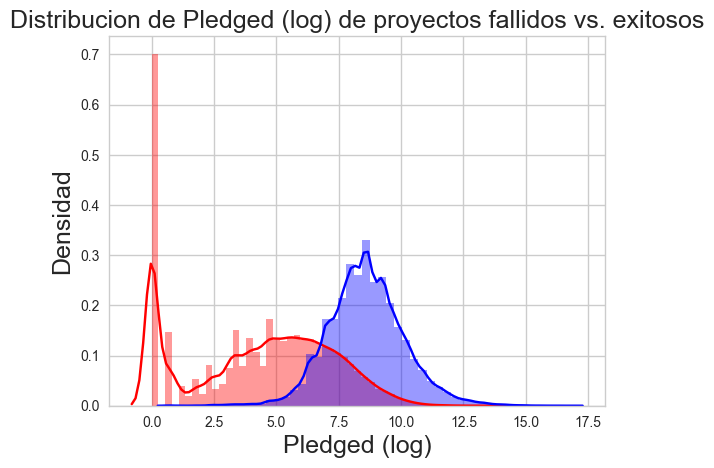

In [127]:
# TODO referencias por color en la visualizacion
g = sns.distplot(failed['pledged_log'], color='r')
g = sns.distplot(success['pledged_log'], color='b')
g.set_title("Distribucion de Pledged (log) de proyectos fallidos vs. exitosos", fontsize=18)
g.set_xlabel("Pledged (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

## Analizando por Estado del proyecto

Otro aspecto que podriamos considerar es analizar los proyecto segun su estado final (variable categorica), para ello podemos sacar inicialmente algunas estadisticas que pueden servirnos para el analisis en relacion a su media y desvio.

In [133]:
print("Calculando la media por estado final del proyecto")
print(round(projects_2017.groupby(["state"])["goal_log", "pledged_log"].mean(),2))

Calculando la media por estado final del proyecto
            goal_log  pledged_log
state                            
canceled        9.16         4.11
failed          8.89         4.30
live            8.72         4.93
successful      8.17         8.59
suspended       8.31         3.99


In [134]:
print("Calculando el desvio standard por estado final del proyecto")
print(round(projects_2017.groupby(["state"])["goal_log", "pledged_log"].std(),2))

Calculando el desvio standard por estado final del proyecto
            goal_log  pledged_log
state                            
canceled        1.79         3.31
failed          1.64         2.90
live            1.72         3.34
successful      1.52         1.53
suspended       2.39         3.80


## Boxplot

Una forma de ver esta misma informacion es utilizar una visualizacion conocida como boxplot. Usualmente usamos un boxplot para ver la distribucion de una variable numerica de acuerdo a una variable categorica (en este caso los distintos estados posibles de un proyecto).

Text(0,0.5,'Pledged')

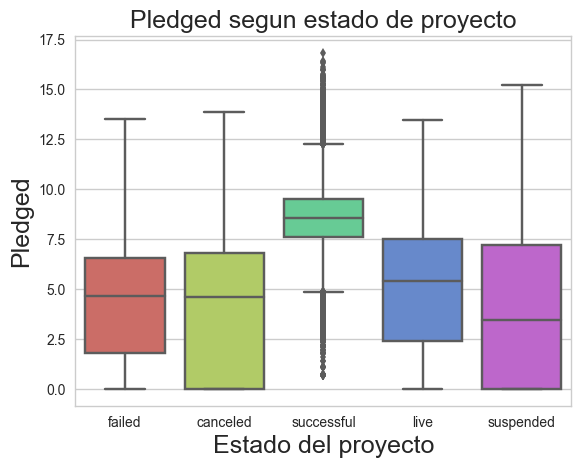

In [136]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
g = sns.boxplot(x="state", y="pledged_log", 
                     data=projects_2017, palette="hls")
g.set_title("Pledged segun estado de proyecto", fontsize=18)
g.set_xlabel("Estado del proyecto", fontsize=18)
g.set_ylabel("Pledged", fontsize=18)

Para leerlo tenemos que considerar que la 'caja' del boxplot va desde el primer al tercer cuantil, es decir que el 25% de los datos estan por debajo de la caja y el 25% de los datos estan por encima de la caja. La caja concentra entonces el 50% de los datos. Las lıneas que salen de la caja van desde el primer cuantil hasta el valor minimo y maximo y los puntos son valores anomalos (outliers).

## Scatter Plot

Es una de las visualizaciones mas comunes, y versatiles. En un scatter plot representamos dos variables numericas en los ejes X e Y y por cada instancia de nuestro set de datos dibujamos un punto en las coordenadas indicadas.
Estos plots nos dan una idea de la dependencia que existe entre las dos variables y de las caracteristicas de esta dependencia: lineal, no-lineal, etc. Por otro lado podemos sumar mas dimensiones al analisis teniendo en cuenta que podemos darles distintos colores a los distintos puntos del plot.

En nuestro caso podemos querer analizar la relacion entre el pledge (log) y el goal (log) analizando su relacion solamente de los proyectos que fueron exitosos y los que no lo fueron. Tener en cuenta para el analisis que ambos se encuentran en escala logaritmica.

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

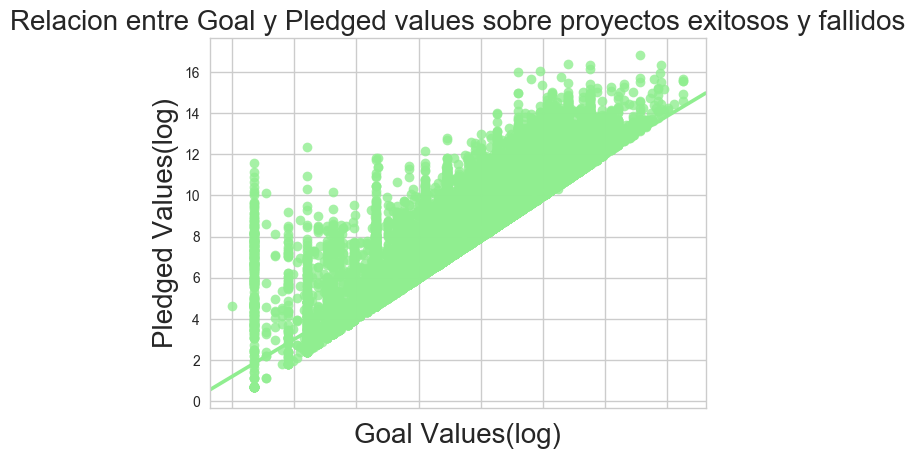

In [138]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# TODO: indicar referencias de colores
g = sns.regplot(x="goal_log", y="pledged_log", 
                    data=success, color="lightgreen")
#g = sns.regplot(x="goal_log", y="pledged_log", 
#                    data=failed, color="orange")
g.set_title("Relacion entre Goal y Pledged values sobre proyectos exitosos y fallidos", fontsize=20)
g.set_xlabel("Goal Values(log)", fontsize=20)
g.set_ylabel("Pledged Values(log)", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

Text(0,0.5,'Pledged Values(log)')

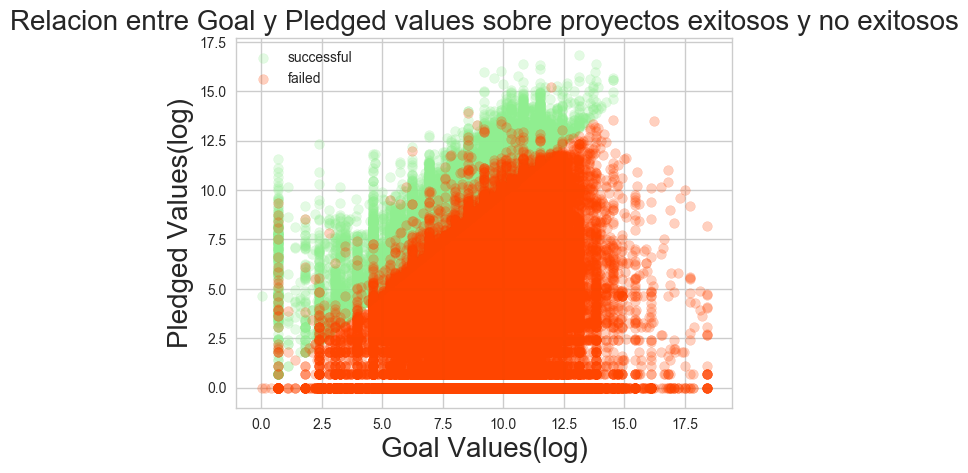

In [150]:
#sacar los live
g = plt.scatter(projects_2017.loc[projects_2017['state'] == 'successful','goal_log'],projects_2017.loc[projects_2017['state'] == 'successful','pledged_log'], alpha='0.25', color='lightgreen', label='successful');
g = plt.scatter(projects_2017.loc[projects_2017['state'] != 'successful','goal_log'],projects_2017.loc[projects_2017['state'] != 'successful','pledged_log'], alpha='0.25', color='orangered', label='failed');
plt.legend();
plt.title("Relacion entre Goal y Pledged values sobre proyectos exitosos y no exitosos", fontsize=20)
plt.xlabel("Goal Values(log)", fontsize=20)
plt.ylabel("Pledged Values(log)", fontsize=20)



# Categoria mas importantes para los proyectos.

Pasando a las variables categoricas podriamos querer analizar cuales son las principales categoria que tienen la mayor cantidad de proyectos.

In [151]:
main_categories_counts = projects_2017["main_category"].value_counts()
main_categories_counts

Film & Video    51922
Music           43238
Publishing      31726
Games           24636
Art             22311
Design          21690
Technology      21556
Food            19941
Fashion         16584
Comics           8910
Theater          8709
Photography      7988
Crafts           6648
Journalism       3540
Dance            3228
Name: main_category, dtype: int64

## Bar Plot

Una forma de poder visualizar este tipo de informacion es utiliza un Bar Plot, de uso bastante popular y donde se cometen muchos errores. Algunas cosas que hay que tener en cuenta es que una de las variables a considerar debe ser categorica y por otro lado, los valores a evaluar deben comenzar en 0.

Existen otras variantes haciendo stacking de valores o directamente indicandolos en barras separadas de forma de que queden agrupados.

Text(0,0.5,'Name of Category')

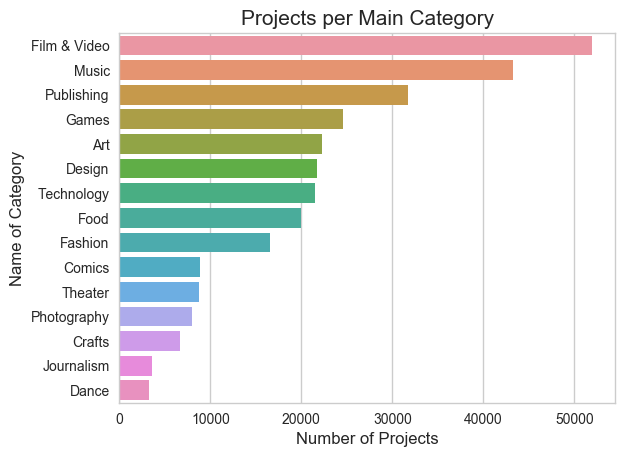

In [152]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x=main_categories_counts.values, y=main_categories_counts.index, orient='h')
g.set_title("Projects per Main Category", fontsize=15)
g.set_xlabel("Number of Projects", fontsize=12)
g.set_ylabel("Name of Category", fontsize=12)

Text(0.5,1,'Projects per Main Category')

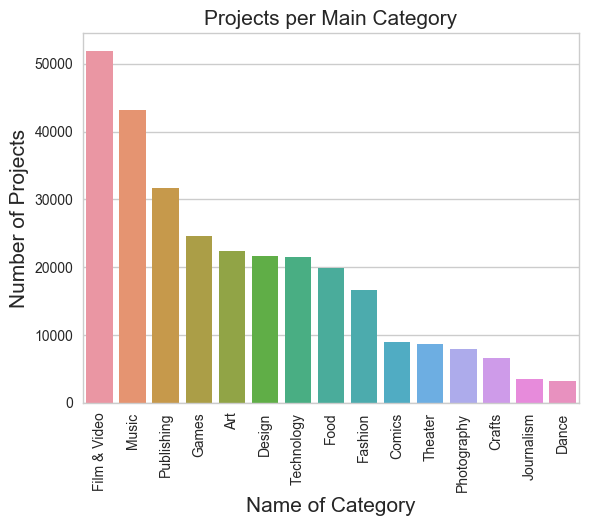

In [155]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
# simplificacion para hacerlo via seaborn con countplot
g = sns.countplot(x='main_category', data=projects_2017, order=projects_2017['main_category'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Name of Category", fontsize=15)
g.set_ylabel("Number of Projects", fontsize=15)
g.set_title("Projects per Main Category", fontsize=15)

## Analisis por Categorias Exitosas y Fallidas

Podemos utilizar este tipo de visualizacion para realizar analisis por categorias exitosas y fallidas.

In [159]:
categories_failed = projects_2017[projects_2017["state"] == "failed"]["category"].value_counts()[:25]
categories_failed

Product Design      7894
Documentary         7185
Food                5829
Music               5177
Fiction             4912
Film & Video        4747
Video Games         4579
Nonfiction          4333
Fashion             4302
Shorts              3975
Apparel             3499
Children's Books    3200
Art                 3164
Technology          2985
Apps                2985
Tabletop Games      2958
Webseries           2956
Photography         2745
Hip-Hop             2618
Publishing          2603
Rock                2413
Narrative Film      2390
Web                 2338
Crafts              2270
Theater             1988
Name: category, dtype: int64

Text(0,0.5,'Nombre de la categoria')

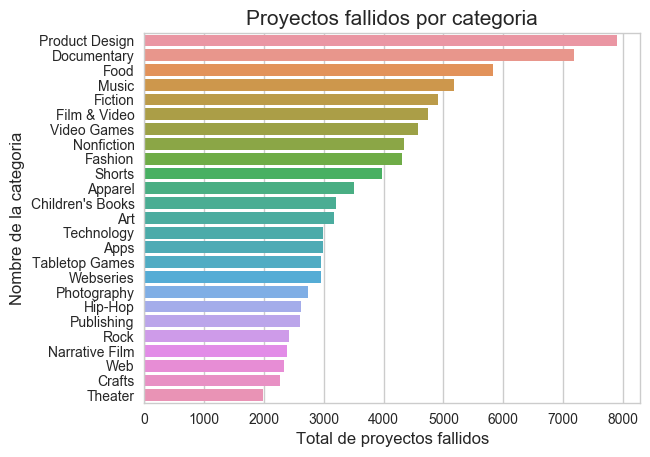

In [160]:
g = sns.barplot(x= categories_failed.values, y=categories_failed.index)
g.set_title("Proyectos fallidos por categoria", fontsize=15)
g.set_xlabel("Total de proyectos fallidos", fontsize=12)
g.set_ylabel("Nombre de la categoria", fontsize=12)

In [161]:
categories_sucessful = projects_2017[projects_2017["state"] == "successful"]["category"].value_counts()[:25]
categories_sucessful

Tabletop Games      5981
Product Design      5838
Music               5749
Shorts              5559
Documentary         5164
Theater             3891
Indie Rock          3441
Rock                3237
Food                2999
Art                 2750
Film & Video        2657
Country & Folk      2595
Comics              2245
Children's Books    1967
Fiction             1925
Narrative Film      1862
Fashion             1849
Nonfiction          1843
Video Games         1671
Photography         1602
Webseries           1528
Dance               1447
Classical Music     1412
Pop                 1395
Public Art          1394
Name: category, dtype: int64

Text(0,0.5,'Nombre de categoria')

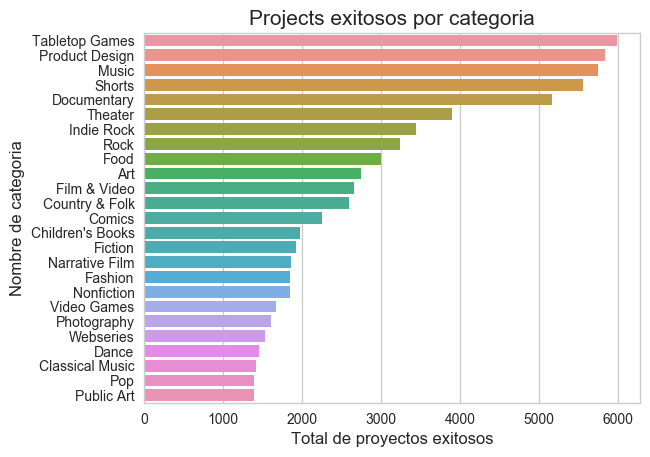

In [162]:
g = sns.barplot(x= categories_sucessful.values, y=categories_sucessful.index)
g.set_title("Projects exitosos por categoria", fontsize=15)
g.set_xlabel("Total de proyectos exitosos", fontsize=12)
g.set_ylabel("Nombre de categoria", fontsize=12)

## Analisis Temporal 

Para poder facilitar el analisis temporal de la informacion agregamos a nuestro data frame algunas columnas a partir del procesamiento de el valor de launched como datetime, y generamos algunas columnas para permitir agrupamientos por año, mes y dia de la semana.

In [163]:
# procesamiento de fechas de lanzamiento en mes y año
projects_2017['launched'] = pd.to_datetime(projects_2017['launched'])
projects_2017['launch_month'] = projects_2017['launched'].dt.month
projects_2017['launch_year'] = projects_2017['launched'].dt.year
projects_2017['launch_weekday_name'] = projects_2017['launched'].dt.weekday_name

Para poder entender algunos aspectos de los datos, utilizamos [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) para obtener una cross tabulacion de dos factores. Por default utiliza la frecuencia.

In [164]:
#cantidades por estado y año
pd.crosstab(projects_2017.launch_year, projects_2017.state)

state,canceled,failed,live,successful,suspended
launch_year,,,,,
1970,6,0,0,0,0
2009,150,600,0,579,0
2010,926,4984,0,4593,16
2011,2144,11878,0,12171,44
2012,2572,20217,0,17706,52
2013,3025,18407,0,17201,54
2014,5288,28498,0,16811,172
2015,6165,31459,0,15451,468
2016,4608,20406,1,12803,212


## Grouped Bar Plot

Para visualizar esta informacion podemos crear un Grouped Bar Plot agrupoando por el estado del proyecto


Text(0,0.5,'Cantidad de Proyectos')

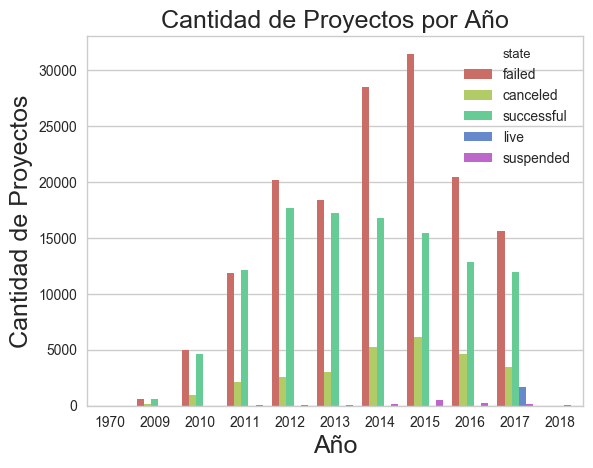

In [167]:
g = sns.countplot(x="launch_year", hue="state", data=projects_2017, palette="hls")
g.set_title("Cantidad de Proyectos por Año", fontsize=18)
g.set_xlabel("Año", fontsize=18)
g.set_ylabel("Cantidad de Proyectos", fontsize=18)

# Nota: Stacked Bar Plot
# al creador de seaborn no le gustan los stacked http://randyzwitch.com/creating-stacked-bar-chart-seaborn/
# Investigar como realizarlo en https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

Tambien podemos con la informacion temporal que tenemos analizar la distribucion de algunas de las variables continuas que consideramos temporalmente, por ejemplo la cantidad de dinero invertido en proyectos por los usuarios (pledged) por año.

Text(0,0.5,'Pledged (log)')

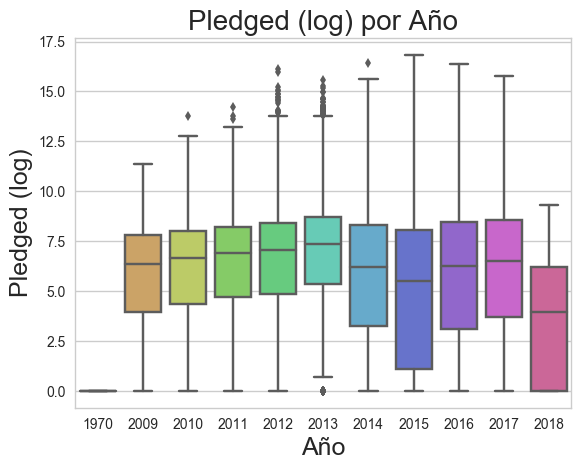

In [168]:
g = sns.boxplot(x="launch_year", y="pledged_log", 
                     data=projects_2017, palette="hls")
g.set_title("Pledged (log) por Año", fontsize=20)
g.set_xlabel("Año", fontsize=18)
g.set_ylabel("Pledged (log)", fontsize=18)

## Analizando Backers de Proyectos

Como analizamos al principio, dado la dispersion de valores que tenemos haremos el analisis de la backers en escala logaritmica.

In [169]:
# creamos una nueva columna en el data frame llevando backers a escala logaritmica.
projects_2017["backers_log"] = np.log(projects_2017["backers"]+1)

Text(0,0.5,'Frecuencia')

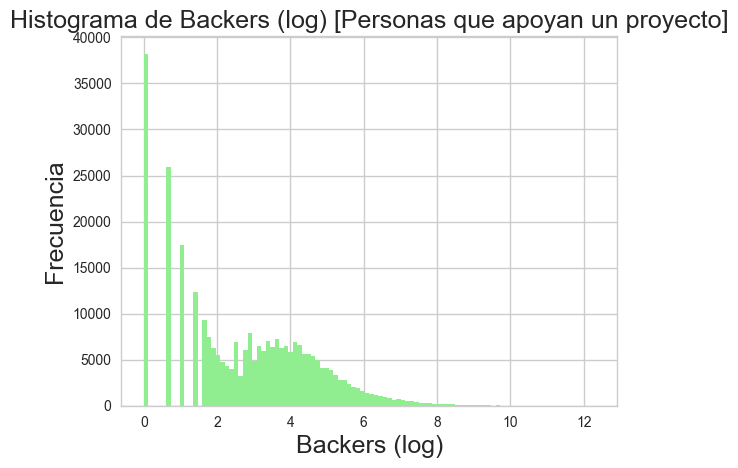

In [171]:
g = projects_2017["backers_log"].plot.hist(bins=100, color="lightgreen") #notese el verde kickstarter xD
g.set_title("Histograma de Backers (log) [Personas que apoyan un proyecto]", fontsize=18)
g.set_xlabel("Backers (log)",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

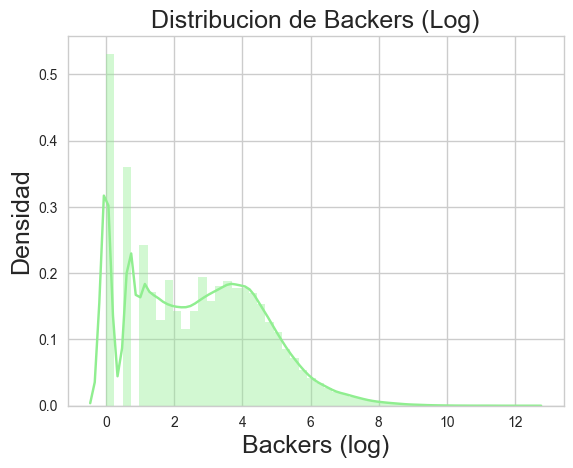

In [172]:
g = sns.distplot(projects_2017["backers_log"], color='lightgreen')
g.set_title("Distribucion de Backers (Log)", fontsize=18)
g.set_xlabel("Backers (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

Por otro lado podemos realizar un analisis creando un scatter plot para los posibles estados de los proyectos usando lmplot.

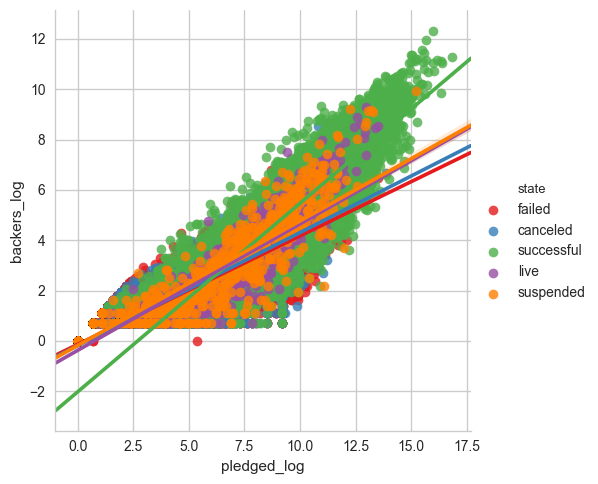

In [173]:
# "Relacion entre Pledged (log) y Goal (log) values sobre proyectos en todos los estados"
g = sns.lmplot(x="pledged_log", y="backers_log", 
                    data=projects_2017, hue='state', palette='Set1')
# ver el tema de alpha

## Heatmap

Supongamos que tenemos un set de datos de la forma (name,variable,value) por ejemplo ("Año Lanzamiento de Proyecto", "Mes de Lanzamiento de Proyecto", "Goal del Proyecto") indicando que en el año 2017, en el mes de Marzo hubo un promedio de 76000 dolares por proyecto. 

Un heatmap representa en el eje Y todos los puntos, instancias (años) y en el eje X cada una de las categorias posibles (meses en este caso). Los ejes suelen ser intercambiables sin que afecte la visualizacin. 

El heatmap es entonces una matriz en donde cada celda muestra el valor que toma la variable del eje X para el punto del eje Y, tomando con valores de un cierto color cuando son mas altos y de otro cuando son mas bajos.

## Analizando Goal por Año y Mes

In [180]:
# llevamos a una representacion de ese tipo usando una tabla pivot (se vera en detalle en la proxima clase).
# tener en cuenta que no puede haber valores duplicados por el indice por lo cual es necesario usar algun tipo
# funcion de agregacion
for_heatmap = projects_2017[projects_2017['state'] == 'successful'].pivot_table(index='launch_year', columns='launch_month', values='goal', aggfunc='mean')

In [181]:
for_heatmap

launch_month,1,2,3,4,5,6,7,8,9,10,11,12
launch_year,,,,,,,,,,,,
2009,NaN,NaN,NaN,2074.454545,1847.466667,2557.916667,3240.937500,4033.568627,4265.794286,3457.294118,3582.779908,4022.148889
2010,4552.002836,4140.338256,4432.711462,3785.462241,4322.569623,4119.877622,4157.089151,4062.142634,4583.233825,4784.331390,4631.090680,4680.829106
2011,4332.518881,4773.097079,4749.699470,5035.032642,5338.261283,5548.365941,5083.204996,4930.934925,5651.796935,5481.881305,6333.647732,5837.975325
2012,5339.176278,6452.110549,6807.354672,8278.394350,8449.810926,8221.950885,9525.177278,9225.337374,10157.087586,9071.887769,9886.934519,8437.668927
2013,9247.062500,9100.227002,11537.985811,13141.980168,11834.056973,10703.785135,11626.443871,9611.949464,12344.797574,12600.220761,10936.474539,10674.370409
2014,9642.691622,9704.844711,11254.212824,12252.041638,12115.167837,11517.903751,8018.304709,9619.761970,10381.707652,11114.099042,11745.758030,8638.576271
2015,11210.079905,12448.050477,10229.981704,10740.500672,12383.394868,13812.117647,12435.244499,11320.630100,12790.272727,13287.185973,13812.543301,8097.245802
2016,9814.164596,11258.024823,12310.829519,11144.968201,13879.028244,12807.203911,10718.231928,10117.740150,11385.753946,12215.438767,11229.770417,8575.045936
2017,7956.558719,11381.474206,9389.221968,10751.591992,12066.699288,11196.821735,11001.638165,10224.002820,11512.531936,11114.630993,9100.361765,4463.641509


Text(50.7222,0.5,'Año de Lanzamiento del Proyecto')

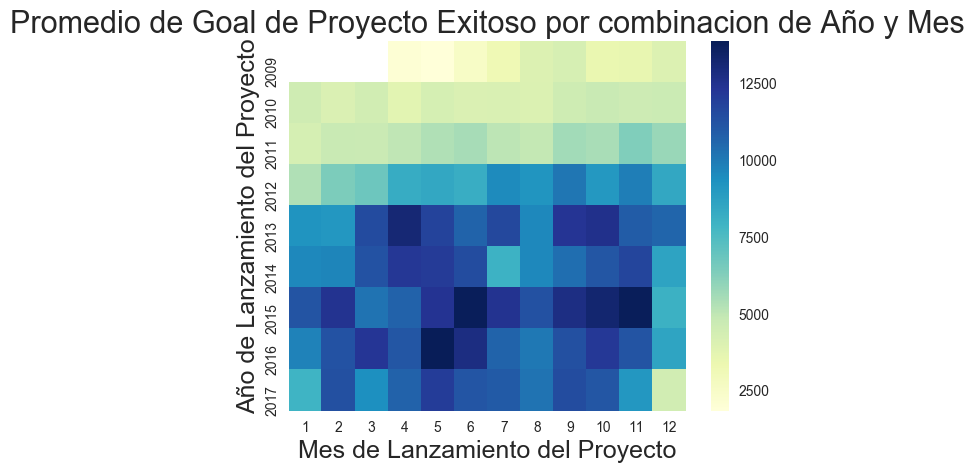

In [183]:
# https://en.wikipedia.org/wiki/Kickstarter
# notar que segun la empresa de lanzo en 2009 en abril
# Launched April 28, 2009; 8 years ago
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Promedio de Goal de Proyecto Exitoso por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)

Text(50.7222,0.5,'Año de Lanzamiento del Proyecto')

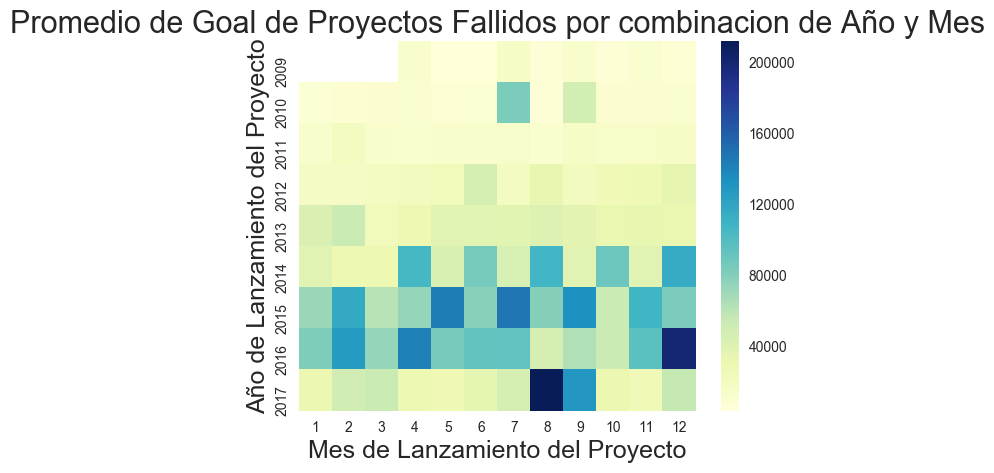

In [185]:
# llevamos a una representacion de ese tipo usando una tabla pivot (se vera en detalle en la proxima clase).
# tener en cuenta que no puede haber valores duplicados por el indice por lo cual es necesario usar algun tipo
# funcion de agregacion
for_heatmap = projects_2017[projects_2017['state'] == 'failed'].pivot_table(index='launch_year', columns='launch_month', values='goal', aggfunc='mean')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Promedio de Goal de Proyectos Fallidos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)

## Analizando Lanzamientos de proyectos por año y mes

In [186]:
# generamos una columna para agregar y procesar mediante una tabla pivot
projects_2017['active_project'] = 1
for_heatmap = projects_2017.pivot_table(index='launch_year', columns='launch_month', values='active_project', aggfunc='sum')

In [187]:
for_heatmap

launch_month,1,2,3,4,5,6,7,8,9,10,11,12
launch_year,,,,,,,,,,,,
1970,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,19.0,74.0,75.0,78.0,115.0,348.0,194.0,218.0,208.0
2010,296.0,371.0,511.0,678.0,760.0,1093.0,1067.0,967.0,1028.0,1210.0,1272.0,1266.0
2011,1594.0,1803.0,2025.0,2243.0,2288.0,2294.0,2368.0,2320.0,2151.0,2311.0,2612.0,2228.0
2012,2903.0,3358.0,4048.0,3773.0,3962.0,3927.0,3664.0,3521.0,3042.0,3397.0,2859.0,2093.0
2013,2919.0,2980.0,3404.0,3549.0,3748.0,3398.0,3458.0,3108.0,3057.0,3454.0,3280.0,2332.0
2014,2759.0,2940.0,3421.0,3485.0,3517.0,3861.0,8198.0,5659.0,4865.0,4934.0,4174.0,2956.0
2015,4955.0,5603.0,5988.0,5489.0,4810.0,4588.0,4033.0,3871.0,3936.0,3839.0,3817.0,2614.0
2016,3332.0,3515.0,3828.0,3455.0,3460.0,3332.0,2994.0,3100.0,2897.0,3176.0,2935.0,2006.0


Text(50.7222,0.5,'Año de Lanzamiento del Proyecto')

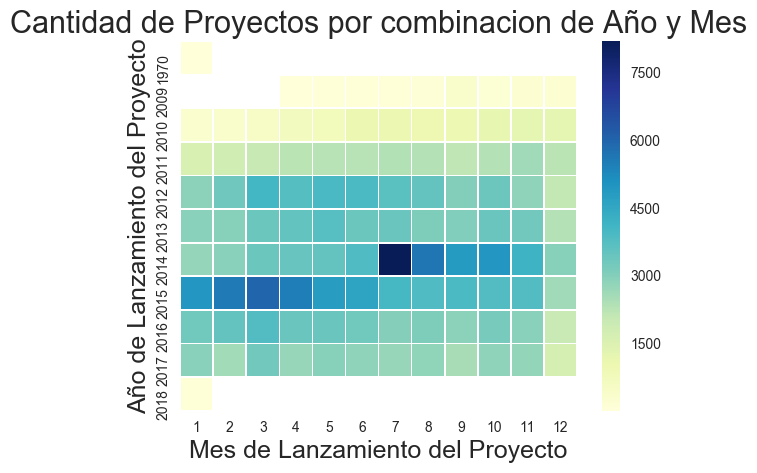

In [188]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)

## Analizando Lanzamientos de proyectos por año y dia de la semana

In [189]:
for_heatmap = projects_2017.pivot_table(index='launch_year', columns='launch_weekday_name', values='active_project', aggfunc='sum')

In [190]:
for_heatmap

launch_weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
launch_year,,,,,,,
1970,NaN,NaN,NaN,NaN,6.0,NaN,NaN
2009,190.0,227.0,109.0,122.0,203.0,257.0,221.0
2010,1641.0,1484.0,1059.0,826.0,1744.0,1936.0,1829.0
2011,4103.0,3788.0,2927.0,2029.0,4400.0,4536.0,4454.0
2012,6742.0,5566.0,3557.0,1708.0,7448.0,8288.0,7238.0
2013,6640.0,5732.0,3350.0,1343.0,6307.0,8187.0,7128.0
2014,8213.0,7911.0,4293.0,2288.0,7996.0,10442.0,9626.0
2015,7987.0,9746.0,4477.0,3046.0,8349.0,10626.0,9312.0
2016,5674.0,6674.0,3123.0,2195.0,5791.0,8085.0,6488.0


Text(50.7222,0.5,'Año de Lanzamiento del Proyecto')

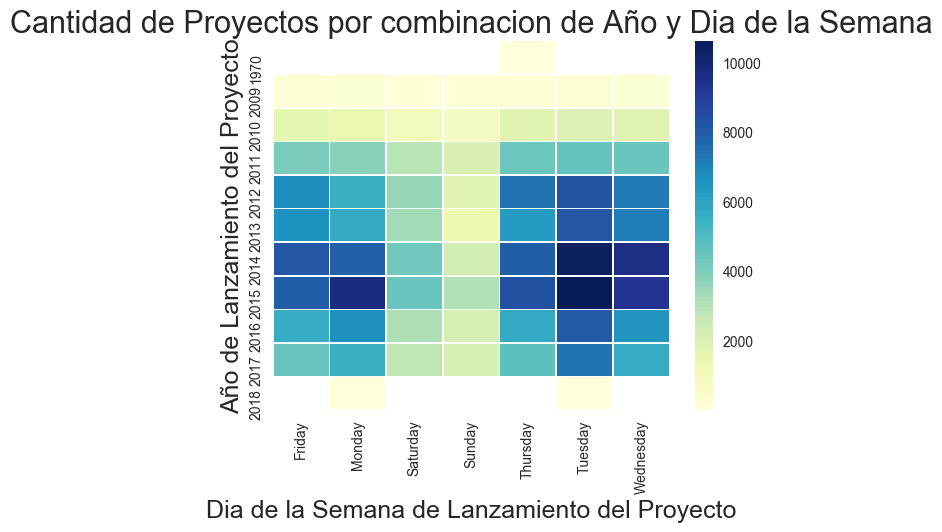

In [191]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu")
# ver ordenamiento
g.set_title("Cantidad de Proyectos por combinacion de Año y Dia de la Semana", fontsize=22)
g.set_xlabel("Dia de la Semana de Lanzamiento del Proyecto",fontsize=18)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=18)